# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned ON


## Filtering 
**1.1**

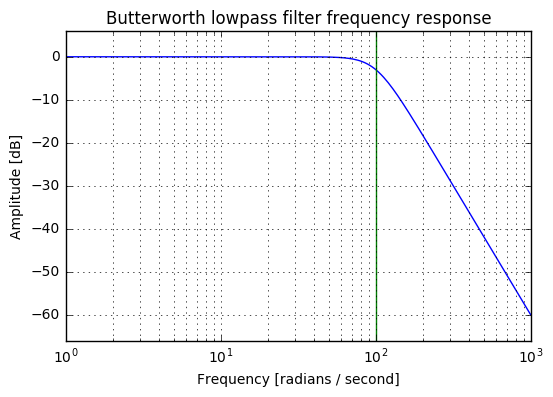

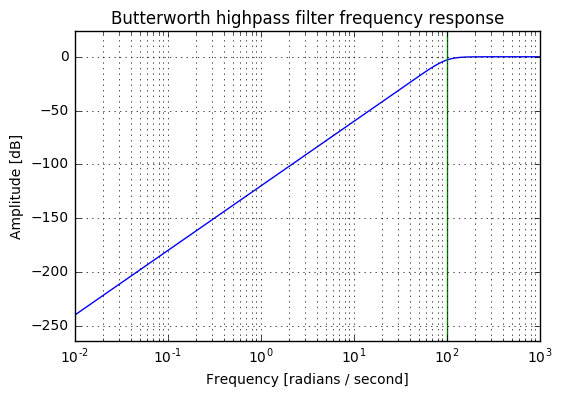

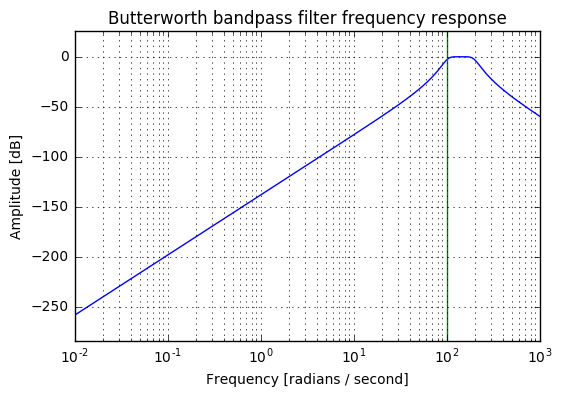

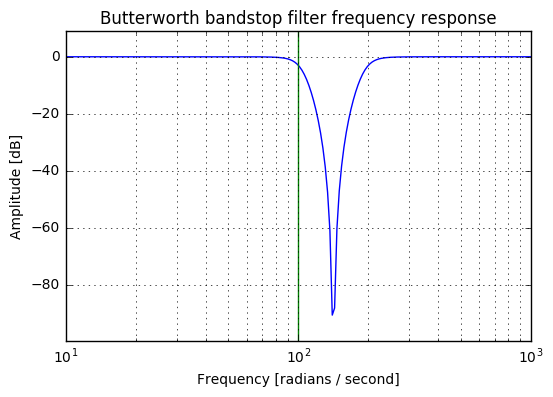

In [12]:
b, a = signal.butter(3, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth lowpass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

b, a = signal.butter(3, 100, 'highpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth highpass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

b, a = signal.butter(3, [100,200], 'bandpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth bandpass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

b, a = signal.butter(3, [100,200], 'bandstop', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth bandstop filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()



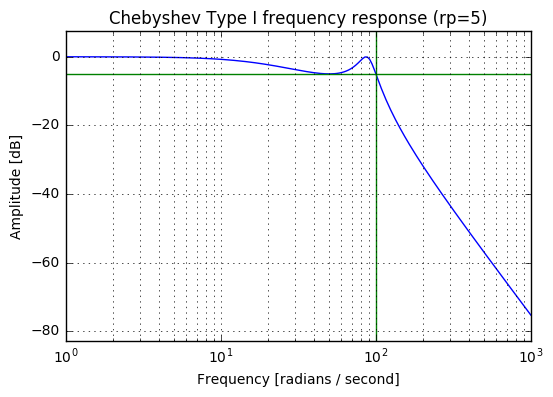

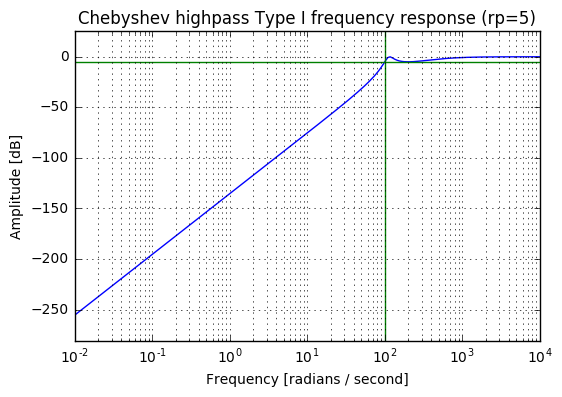

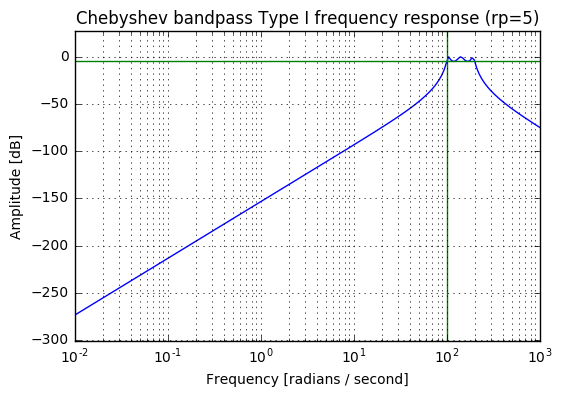

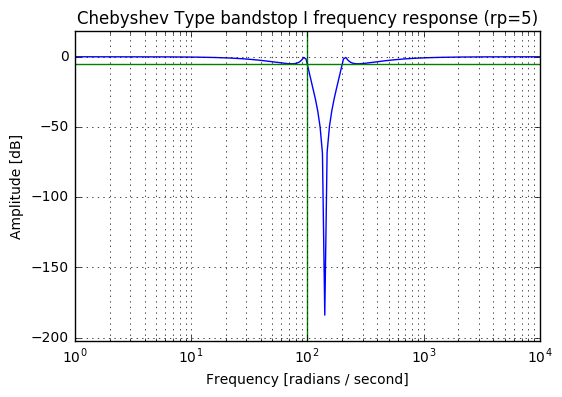

In [14]:
b, a = signal.cheby1(3, 5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

b, a = signal.cheby1(3, 5, 100, 'highpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebyshev highpass Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

b, a = signal.cheby1(3, 5, [100,200], 'bandpass', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebyshev bandpass Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

b, a = signal.cheby1(3, 5, [100,200], 'bandstop', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Chebyshev Type bandstop I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

**1.2**

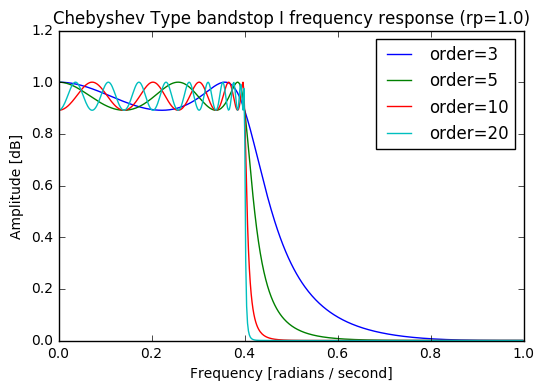

In [22]:
b, a = signal.cheby1(3, 1.0, 0.4, 'low')
w, h = signal.freqz(b, a)

b1, a1 = signal.cheby1(5, 1.0, 0.4, 'low')
w1, h1 = signal.freqz(b1, a1)

b2, a2 = signal.cheby1(10, 1.0, 0.4, 'low')
w2, h2 = signal.freqz(b2, a2)

b3, a3 = signal.cheby1(20, 1.0, 0.4, 'low')
w3, h3 = signal.freqz(b3, a3)

plt.plot(w/np.pi, abs(h), label="order=3")
plt.plot(w1/np.pi, abs(h1), label="order=5")
plt.plot(w2/np.pi, abs(h2), label="order=10")
plt.plot(w3/np.pi, abs(h3), label="order=20")
plt.title('Chebyshev Type bandstop I frequency response (rp=1.0)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.show()

we see that with increasing order our filter goes farther from the unit circle, so it becomes more unstable, however, as a filter, with increasing order it starts to work better, as we can see the most straight line is with the highest order.

## Recursive filter 

**2.1**

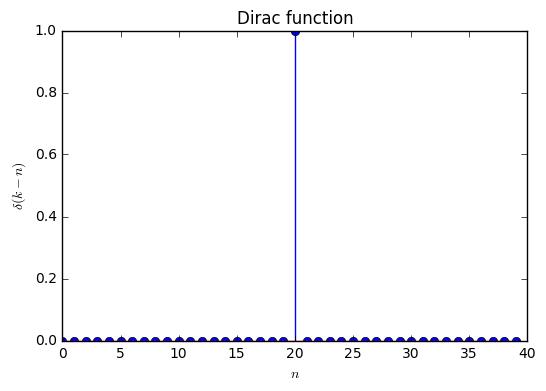

In [24]:
def dirac(n=0, N=20):
    if n>(N-1):
        raise ValueError ('n should be infrior to N-1')
    s=np.zeros((N, ))
    s[n]=1
    return s
plt.stem(dirac(20,40))
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('Dirac function')

**2.2**

In [ ]:
def anticasual (x,a,alfa):
    
    for i in np.range (len(x), 0, -1):
        y[i] = a*(alfa-1)*x[i+1]-a.^2 *x[i+2] - 2*a*y[i+1]
        

**2.3**

**2.4**

**3.1**

**3.2** , **3.3**

**3.4**